-1

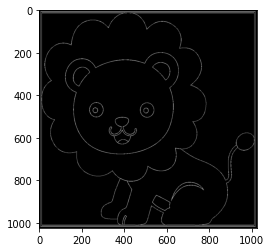

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/drive/MyDrive/Assignment25/lion.png', cv2.IMREAD_GRAYSCALE)
result = np.zeros(image.shape)
mask = np.array([[0, -1, 0],
                 [-1, 4, -1],
                [0, -1, 0]])

rows, cols = image.shape
for i in range(1, rows -1):
  for j in range(1, cols - 1):
    small_image = image[i-1:i+2, j-1:j+2]
    besco = np.multiply(small_image, mask)
    out = np.sum(besco)
    result[i, j] = out
    
result = np.uint8(result)
plt.imshow(result, cmap='gray')
cv2.imwrite('/content/drive/MyDrive/Assignment25/loin_mask.jpg',result)
cv2.waitKey(10)


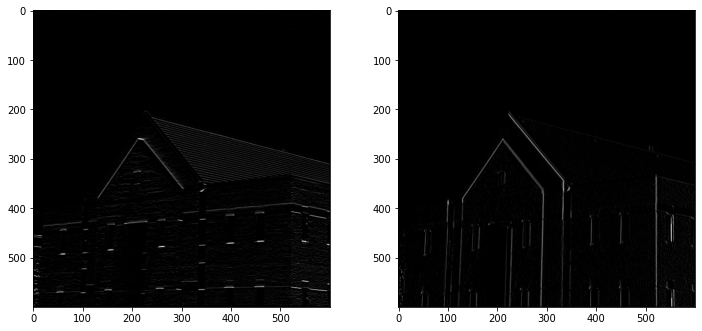

-1

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/drive/MyDrive/Assignment25/building.tif', cv2.IMREAD_GRAYSCALE)
result_h = np.zeros(image.shape)
result_v = np.zeros(image.shape)

mask_h = np.array([[-1, -1, -1],
                 [0, 0, 0],
                [1, 1, 1]])
mask_v = np.array([[-1, 0, 1],
                 [-1, 0, 1],
                [-1, 0, 1]])

rows, cols = image.shape
for i in range(1, rows -1):
  for j in range(1, cols - 1):
    small_image_h = image[i-1:i+2, j-1:j+2]
    temp_h = np.multiply(small_image_h, mask_h)
    out_h = np.sum(temp_h)
    if out_h < 0:
      result_h[i, j] = 0 
    else:
      result_h[i, j] = out_h

for k in range(1, rows -1):
  for l in range(1, cols - 1):
    small_image_v = image[k-1:k+2, l-1:l+2]
    temp_v = np.multiply(small_image_v, mask_v)
    out_v = np.sum(temp_v)
    if out_v < 0:
      result_v[k, l] = 0 
    else:
      result_v[k, l] = out_v


fig = plt.figure(figsize=(12, 12))
fig.add_subplot(2, 2, 1)
plt.imshow(result_h, cmap='gray')
fig.add_subplot(2, 2, 2)
plt.imshow(result_v, cmap='gray')
plt.show()

cv2.imwrite('/content/drive/MyDrive/Assignment25/buuilding_mask_h.jpg',result_h)
cv2.imwrite('/content/drive/MyDrive/Assignment25/buuilding_mask_v.jpg',result_v)
cv2.waitKey(10)


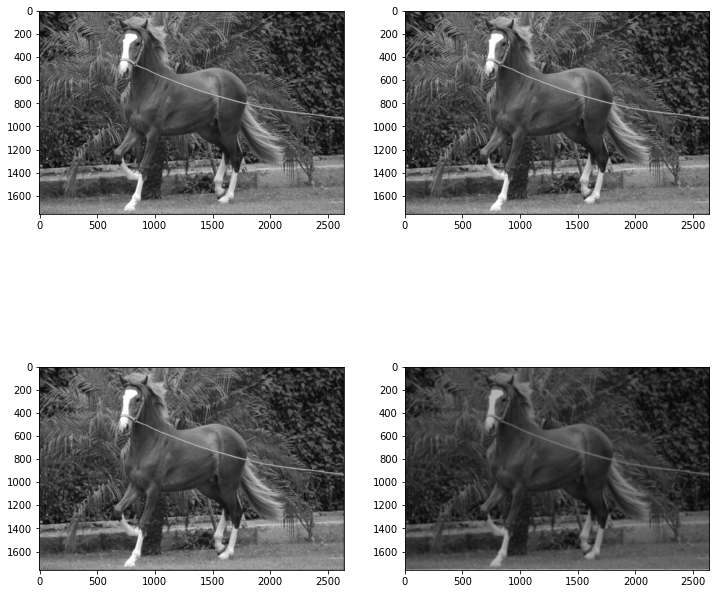

-1

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/drive/MyDrive/Assignment25/hourse1.jpg', cv2.IMREAD_GRAYSCALE)
result = np.zeros(image.shape)
fig = plt.figure(figsize=(12, 12))

size = [[3,3], [5, 5], [7, 7], [15, 15]]
amount = [1/9, 1/15, 1/25, 1/225]
rows, cols = image.shape

for _ in range(len(size)):
  mask = np.ones(size[_])* amount[_]
  for i in range(size[_][0]//2, rows - (size[_][0]//2)):
    for j in range(size[_][0]//2, cols - (size[_][0]//2)):
      small_image = image[i-size[_][0]//2:i+(size[_][0]//2+1), j-size[_][0]//2:j+(size[_][0]//2+1)]
      temp = np.multiply(small_image, mask)
      out = np.sum(temp)
      if out < 0:
        result[i, j] = 0 
      else:
        result[i, j] = out
  fig.add_subplot(2, 2, _+1)
  plt.imshow(result, cmap='gray')

plt.show()
cv2.waitKey(0)

-1

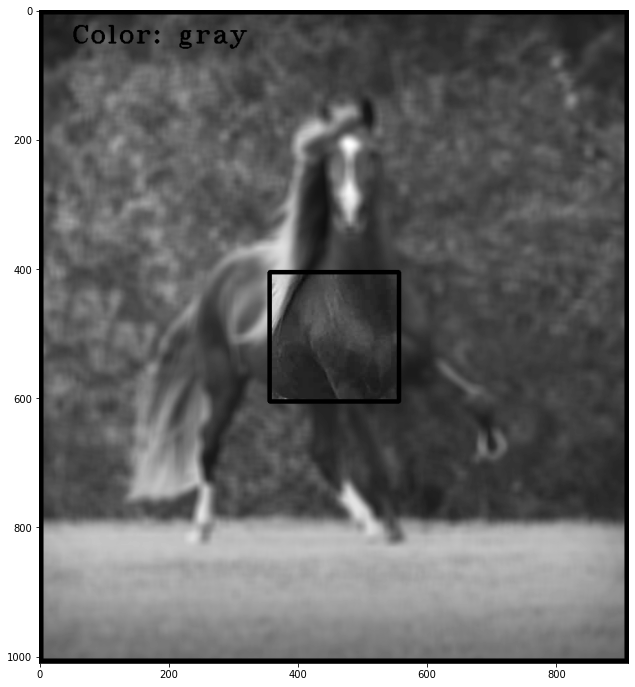

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/drive/MyDrive/Assignment25/hourse2.jpg', cv2.IMREAD_GRAYSCALE)
result = np.zeros(image.shape)
fig = plt.figure(figsize=(12, 12))
rows, cols = image.shape

def convolution(size, amount):
  mask = np.ones(size)* amount
  for i in range((size//2), rows - (size//2)):
    for j in range((size//2), cols - (size//2)):
      small_image = image[i-(size//2):i+(size//2 + 1), j-(size//2):j+(size//2 + 1)]
      temp = np.multiply(small_image, mask)
      out = np.sum(temp)
      if out < 0:
        result[i, j] = 0 
      else:
        result[i, j] = out
  return result

def detectColor(center_square):
  black = 0
  white = 0
  gray = 0
  for i in range(center_square.shape[0]):
    for j in range(center_square.shape[1]):
      if center_square[i,j] <= 40:
        black += 1
      elif center_square[i,j] >= 230:
        white += 1
      else:
        gray += 1
    if black >= gray and black >= white:
      return 'black'
    elif white >= black and black >= gray:
      return 'white'
    else:
      return 'gray'

result = convolution(15, 1/225)

center_square = image[int(rows/2) -100: int(rows/2) +100, int(cols/2) -100: int(cols/2) +100]

cv2.putText(result, "Color: {}".format(detectColor(center_square)), (50, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 2, (0, 0, 255), 2)

result[int(rows/2) -100: int(rows/2) +100, int(cols/2) -100: int(cols/2) +100] = center_square

center_square_border = cv2.rectangle(result, (int(cols/2) -100, int(rows/2) -100), (int(cols/2) +100, int(rows/2) +100), (0, 0, 0), 5)

plt.imshow(result, cmap='gray')
cv2.waitKey(0)